In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load the dataset
df = pd.read_csv('E:/Unifield-internship/Project/Salaries for San Francisco Employee/Total.csv')

# Display basic information and summary statistics
print("Dataset Information:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

# Check for any missing values
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312882 entries, 0 to 312881
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      312882 non-null  object 
 1   JobTitle          312882 non-null  object 
 2   BasePay           312882 non-null  object 
 3   OvertimePay       312882 non-null  object 
 4   OtherPay          312882 non-null  object 
 5   Benefits          312882 non-null  object 
 6   TotalPay          312882 non-null  float64
 7   TotalPayBenefits  312882 non-null  float64
 8   Year              312882 non-null  int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 21.5+ MB
None

Summary Statistics:
            TotalPay  TotalPayBenefits           Year
count  312882.000000     312882.000000  312882.000000
mean    78802.645788     100928.339777    2014.625303
std     53230.758542      66485.186495       2.290899
min      -618.130000      -3628.7800

C:\Users\DHRUV\AppData\Local\Temp\ipykernel_1432\4128135138.py:8: DtypeWarning: Columns (2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('E:/Unifield-internship/Project/Salaries for San Francisco Employee/Total.csv')


In [2]:
df.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,Not Provided,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,Not Provided,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,Not Provided,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,Not Provided,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,Not Provided,326373.19,326373.19,2011


In [3]:
df['BasePay'] = pd.to_numeric(df['BasePay'], errors='coerce')
df['OvertimePay'] = pd.to_numeric(df['OvertimePay'], errors='coerce')
df['OtherPay'] = pd.to_numeric(df['OtherPay'], errors='coerce')

df['Benefits'] = pd.to_numeric(df['Benefits'], errors='coerce')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312882 entries, 0 to 312881
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      312882 non-null  object 
 1   JobTitle          312882 non-null  object 
 2   BasePay           312276 non-null  float64
 3   OvertimePay       312881 non-null  float64
 4   OtherPay          312881 non-null  float64
 5   Benefits          276722 non-null  float64
 6   TotalPay          312882 non-null  float64
 7   TotalPayBenefits  312882 non-null  float64
 8   Year              312882 non-null  int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 21.5+ MB


In [5]:
from sklearn.preprocessing import LabelEncoder

# Initialize encoder
label_encoder = LabelEncoder()

# Encode categorical columns
df['Benefits'] = label_encoder.fit_transform(df['Benefits']) 

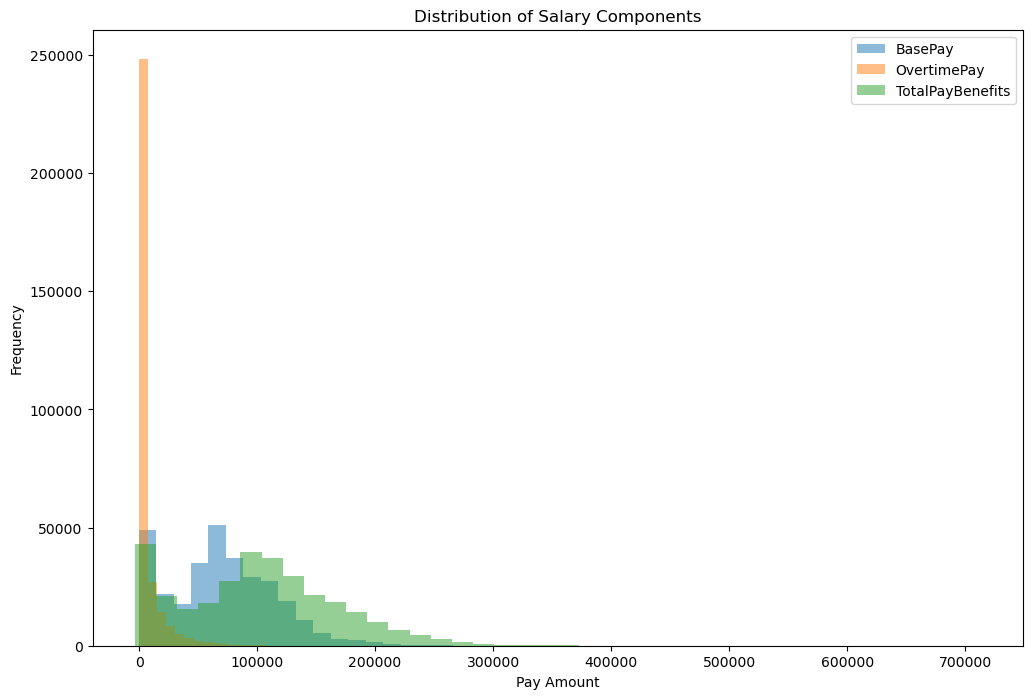

C:\Users\DHRUV\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


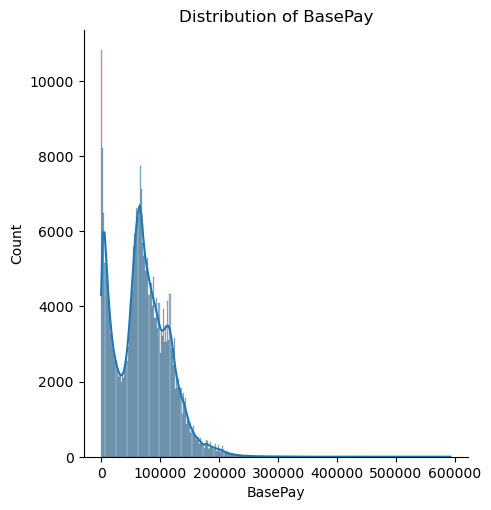

In [6]:
# -------------------------------
# 1. Salary Distribution Analysis
# -------------------------------

plt.figure(figsize=(12, 8))
bins = 40  # you can adjust number of bins as needed

# Plot histograms for the key pay components
plt.hist(df['BasePay'], bins=bins, alpha=0.5, label='BasePay')
plt.hist(df['OvertimePay'], bins=bins, alpha=0.5, label='OvertimePay')
plt.hist(df['TotalPayBenefits'], bins=bins, alpha=0.5, label='TotalPayBenefits')
plt.xlabel('Pay Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Salary Components')
plt.legend()
plt.show()

# As an alternative, using seaborn for a single variable distribution (BasePay)
sns.displot(df['BasePay'], kde=True)
plt.title('Distribution of BasePay')
plt.show()


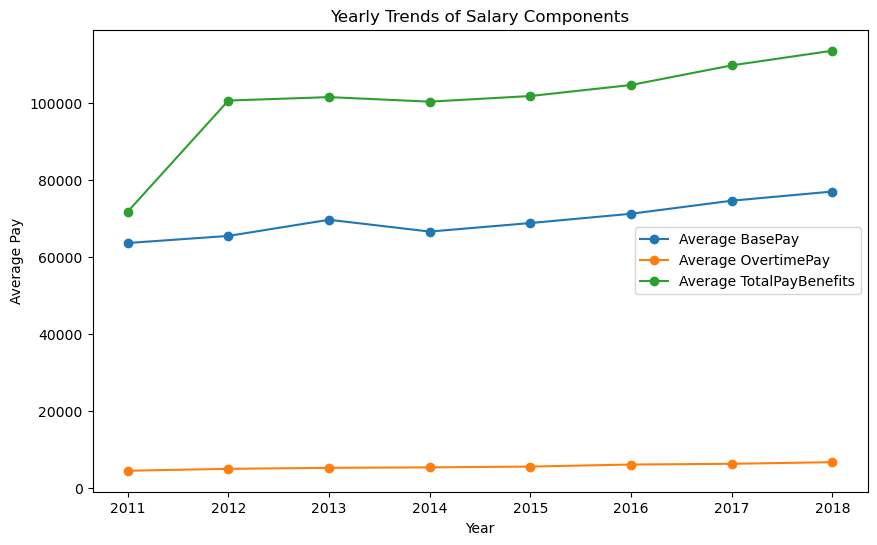

In [7]:
# --------------------------------
# 2. Trend Analysis Over the Years
# --------------------------------

# Group the data by year and calculate the average pay components per year
yearly_agg = df.groupby('Year').agg({
    'BasePay': 'mean',
    'OvertimePay': 'mean',
    'TotalPayBenefits': 'mean'
}).reset_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_agg['Year'], yearly_agg['BasePay'], marker='o', label='Average BasePay')
plt.plot(yearly_agg['Year'], yearly_agg['OvertimePay'], marker='o', label='Average OvertimePay')
plt.plot(yearly_agg['Year'], yearly_agg['TotalPayBenefits'], marker='o', label='Average TotalPayBenefits')
plt.xlabel('Year')
plt.ylabel('Average Pay')
plt.title('Yearly Trends of Salary Components')
plt.legend()
plt.show()

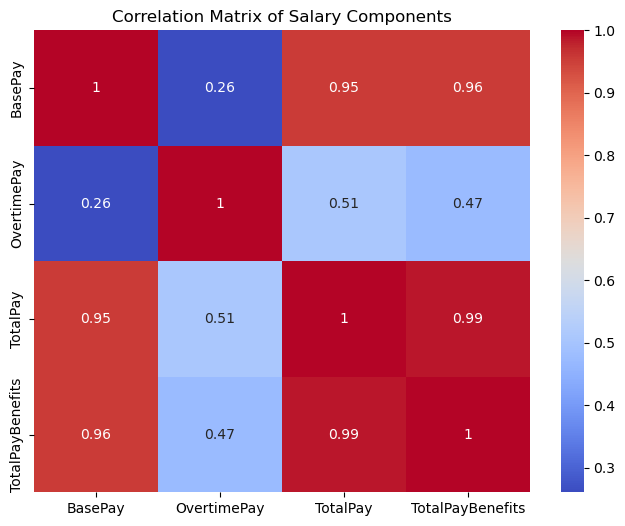

In [8]:
# -------------------------------
# 3. Correlation Analysis
# -------------------------------

# Compute correlation among numeric pay components
corr_matrix = df[['BasePay', 'OvertimePay', 'TotalPay', 'TotalPayBenefits']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Salary Components')
plt.show()

Top 10 High-Paying Job Titles (Average TotalPayBenefits):
JobTitle
Chief Investment Officer                          611728.638000
Physician Administrator, DPH                      454471.806667
Managing Director                                 438767.559091
Chief, Fire Department                            417767.857143
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY    399211.275000
Gen Mgr, Public Trnsp Dept                        389126.942857
Assistant Chief of Police                         387003.872500
Administrator, DPH                                374311.562857
Dept Head V                                       365736.799048
Chief of Police                                   360199.826667
Name: TotalPayBenefits, dtype: float64


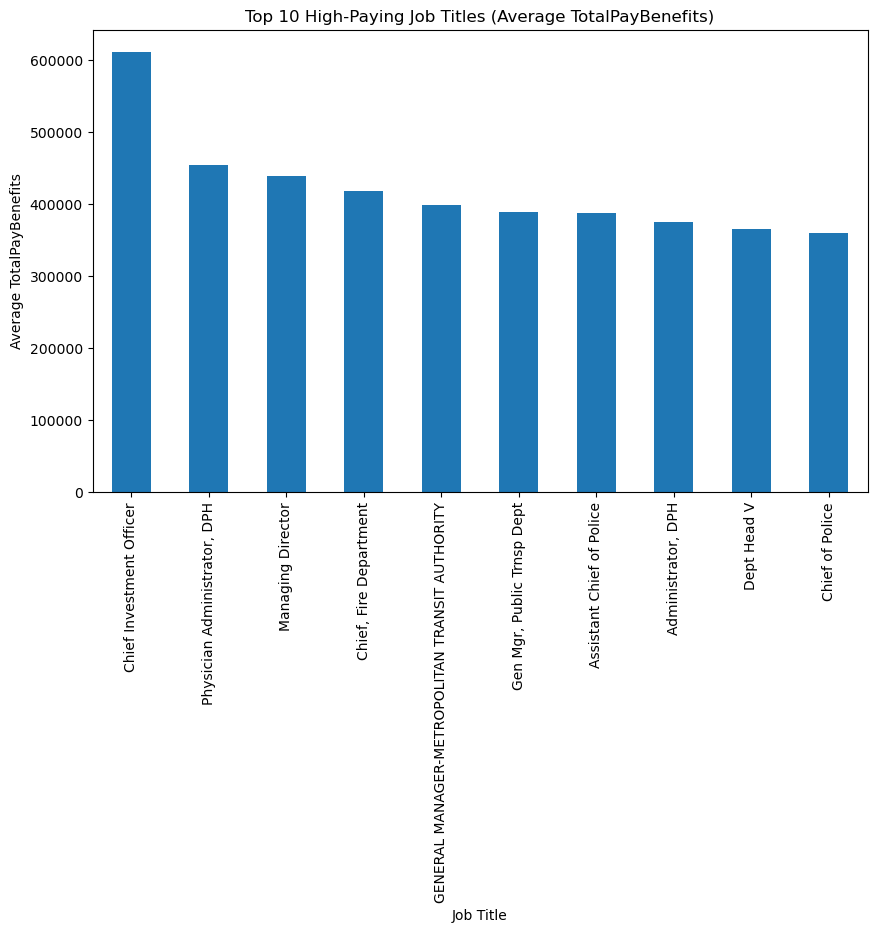

In [9]:
# ------------------------------------
# 4. Analysis by Job Title (Categorical)
# ------------------------------------

# Since JobTitle is categorical, we look at average TotalPayBenefits for each job title
job_pay = df.groupby('JobTitle')['TotalPayBenefits'].mean().sort_values(ascending=False).head(10)
print("Top 10 High-Paying Job Titles (Average TotalPayBenefits):")
print(job_pay)

plt.figure(figsize=(10, 6))
job_pay.plot(kind='bar')
plt.title('Top 10 High-Paying Job Titles (Average TotalPayBenefits)')
plt.xlabel('Job Title')
plt.ylabel('Average TotalPayBenefits')
plt.show()

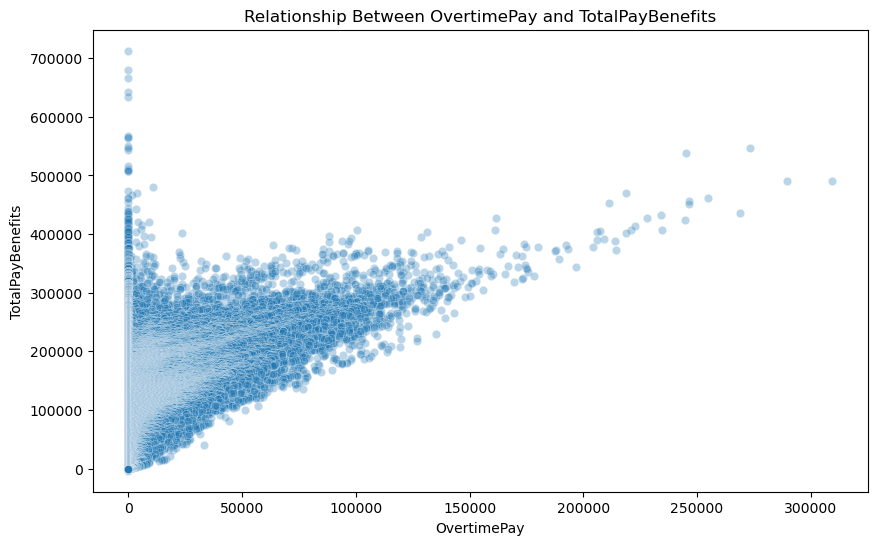

In [10]:
# -------------------------------------
# 5. Relationship between Overtime and Total Payment
# -------------------------------------

plt.figure(figsize=(10, 6))
sns.scatterplot(x='OvertimePay', y='TotalPayBenefits', data=df, alpha=0.3)
plt.title('Relationship Between OvertimePay and TotalPayBenefits')
plt.xlabel('OvertimePay')
plt.ylabel('TotalPayBenefits')
plt.show()


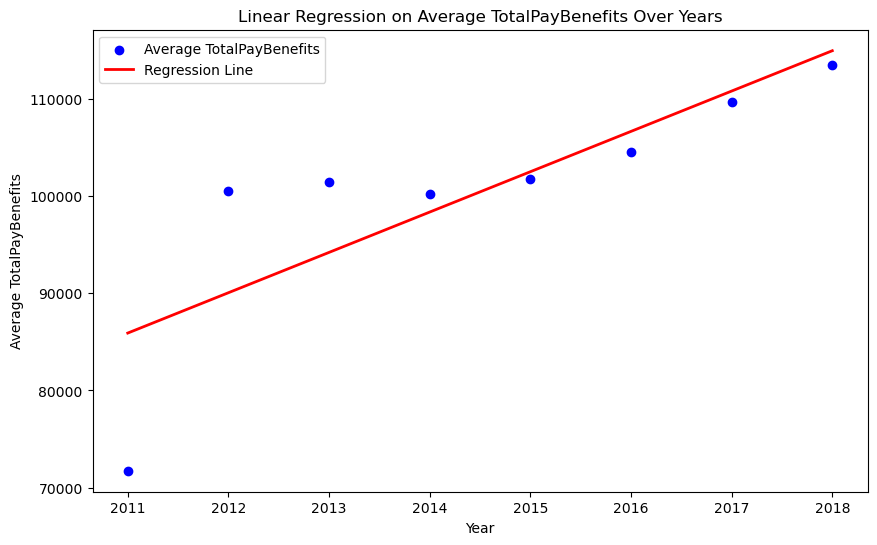


Predicted average TotalPayBenefits for future years:
Year 2019: 119105.25
Year 2020: 123255.01
Year 2021: 127404.78
Year 2022: 131554.54
Year 2023: 135704.31


In [11]:
# -------------------------------------
# 6. Predictive Analysis: Forecasting Future Pay Trends
# -------------------------------------

# We use the yearly average TotalPayBenefits to build a simple linear regression model
yearly_pay = df.groupby('Year').agg({'TotalPayBenefits': 'mean'}).reset_index()
X = yearly_pay['Year'].values.reshape(-1, 1)
y = yearly_pay['TotalPayBenefits'].values

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Plot the regression line with the actual data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Average TotalPayBenefits')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Average TotalPayBenefits')
plt.title('Linear Regression on Average TotalPayBenefits Over Years')
plt.legend()
plt.show()

# Forecast for the next 5 years beyond the latest year in the dataset
max_year = yearly_pay['Year'].max()
future_years = np.array([max_year + i for i in range(1, 6)]).reshape(-1, 1)
future_predictions = model.predict(future_years)

print("\nPredicted average TotalPayBenefits for future years:")
for year, prediction in zip(future_years.flatten(), future_predictions):
    print(f"Year {year}: {prediction:.2f}")